## TMDB Movies Dataset - Data Exploration & Visualization
#### By Sourojyoti Paul

#### Introduction & Overview
**Dataset Description**
>*Dataset URL : https://www.kaggle.com/tmdb/tmdb-movie-metadata The Dataset contains 5000+ movie data containing data of major films costing over 100 million dollars to produce, which can still flop, this question is more important than ever to the industry. It is expected that after reading and analysing this particular dataset we would be able to answer some of the more important questions revolving around film industry.*

### Preliminary Wrangling
>*Here we will perform certain operations to inspect the dataset, check if there are instances of missing data or presence of erroneous data. Here we may also find inconsistent data.
So here we will clean and unify messy and complex data.*

In [39]:
#Required package imports
import pandas as pd
import numpy as np
import seaborn as sns
import csv
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

In [40]:
#Loading dataset
df = pd.read_csv('/content/drive/MyDrive/Notebook/communicate_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Understanding & Assessing Data
##### Investigating Dataset

In [41]:
df.shape

(10866, 21)

>*So, the dataset we are performing analysis is having*
<br>
**ROWS**    : 10866
<br>
**COLUMNS** : 21

In [42]:
# Understanding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

##### Issue 1
>We need to drop or remove the features or colums which we don't require or we will not be using in our analysis.<br>
Features to be dropped : id, homepage, tagline, keywords, overview

In [43]:
# Checking if there are any duplicates in the dataset
sum(df.duplicated())

1

##### Issue 2
>There is one duplicated row present in the dataset

In [44]:
# Checking if there are any null value associated in the dataset
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

##### Issue 3
>We could see there are features where null values are present.

##### Issue 4
> Adding a now column 'Profit' to check if there has been a profit or a loss

#### Cleaning & Fixing Dataset
*Here we will clean and fix the issues we have found in the above investigation*

##### Issue 1
Drop or remove the features or colums which we don't require or we will not be using in our analysis.
<br><br>
Define : Features to be dropped : id, homepage, tagline, keywords, overview
<br><br>
Code :

In [45]:
#Dropping or removing the features or colums which we don't require or we will not be using in our analysis.
#Features to be dropped : id, homepage, tagline, keywords, overview
features_not_required = ["id","imdb_id","cast","homepage","tagline","keywords","overview"]
df.drop(features_not_required, inplace=True, axis=1)

Test :

In [46]:
# Testing the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_date          10866 non-null  object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
 12  budget_adj            10866 non-null  float64
 13  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


>We have successfully removed the features which we won't be using this this analysis

#### Issue 2
There is one duplicated row present in the dataset
<br>
<br>
Define : We need to remove the duplicate value present in the dataset as it may cause error in the analysis
<br>
<br>
Code :

In [47]:
#Removing the only duplicate present in the dataset
df.drop_duplicates(inplace=True)

Test :

In [48]:
# Testing the changes
sum(df.duplicated())

0

>We have successfully removed the only duplicate from the dataset

##### Issue 3
There are features where null values are present.
<br>
<br>
Define : Null values in the dataset leads to erroneous analysis, hence we need to remove the null values
<br>
<br>
Code :

In [49]:
# Confirming which features are having null values
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [50]:
# So we can see that the following features are having null values
# director, genres, production_companies
# Dropping the null values
df = df.dropna()

Test :

In [51]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

>We have successfully removed the null values from the dataset

##### Issue 4
Adding a now column 'Profit' to check if there has been a profit or a loss
<br>
<br>
Define : Adding a now column 'Profit' to check if there has been a profit or a loss by performing subtract operation<br>
Profit = Revenue - Budget<br>
Now if the result is negative that means there has been a loss where as for positive results it means profit
<br>
<br>
Code :

In [52]:
df.insert(1,"profit", df["revenue"] - df["budget"])

Test :

In [53]:
# Testing the change
df.head()

,popularity,profit,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,1363528810,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,228436354,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,185238201,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,1868178225,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,1316249360,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>We have successfully added a new feature 'profit' to our dataset

### What is the structure of your dataset?
> The origina dataset has 10866 rows and 21 columns <br>
The dataset is having wide spread features as : <br> 
*id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj.*
Most of the features where we are interested in this dataset are numerical, except for genres & production_companies. These two categorical features requires attention, we will split and expand them once we are done with preliminary exploration.
*profit is a engineered feature, it is engineered by deducting budget from revenue. If the obtained value is positive it indicates profit, otherwise it indicates loss*

### What is/are the main feature(s) of interest in your dataset?
> In this dataset there are multiple features which draws interests, like vote_average, release_year, genres, popularity, budget, revenue, budget_adj, revenue_adj, runtime

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> Features that is going to support this specific investigation are as follows:<br>
popularity, budget, revenue, original_title, runtime, release_date, vote_average, release_year
<br>
profit is a feature which is engineered, going forward we will engineer features as and when required to support the analysis

### Univariate Analysis

In [54]:
# in a new dataframe we will split the genre and perform univariate analysis
# in the original genre column we can see multiple genres are clubbed together with a '|' as seperator
# split genres string, at |, explode the list to rows
genres_df = df.assign(genres=df['genres'].str.split('|')).explode('genres')
genres_df.head(10)

,popularity,profit,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,1363528810,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,1363528810,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,1363528810,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,1363528810,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,228436354,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
1,28.419936,228436354,150000000,378436354,Mad Max: Fury Road,George Miller,120,Adventure,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
1,28.419936,228436354,150000000,378436354,Mad Max: Fury Road,George Miller,120,Science Fiction,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
1,28.419936,228436354,150000000,378436354,Mad Max: Fury Road,George Miller,120,Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,185238201,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
2,13.112507,185238201,110000000,295238201,Insurgent,Robert Schwentke,119,Science Fiction,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


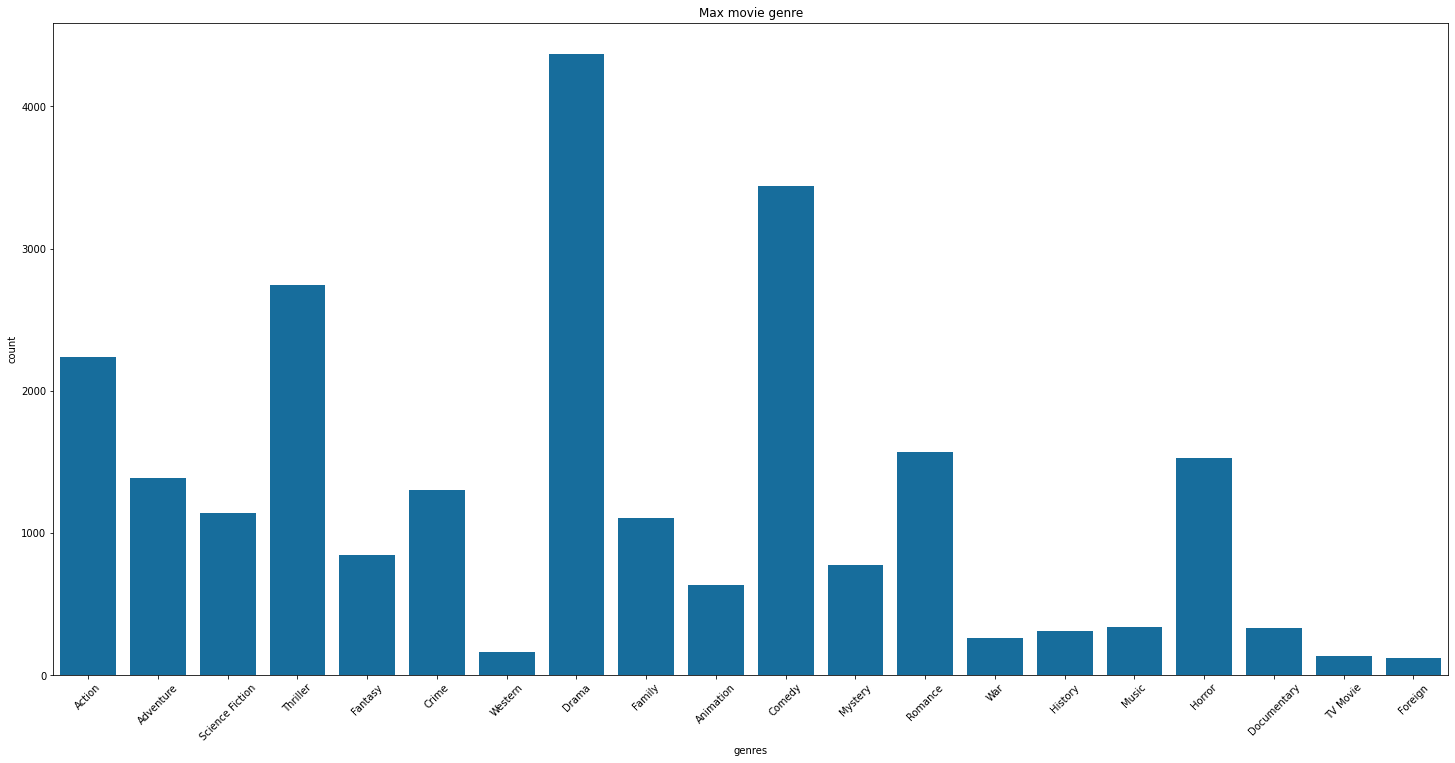

In [55]:
# now we will perform count plot to visualize which genre holds the highest number of movies
base_color = sns.color_palette('colorblind')[0]
plt.figure(figsize=(25, 12));
plt.xticks(rotation=45);
sns.countplot(genres_df.genres, color=base_color);
plt.title('Max movie genre')
plt.show();

We can clearly see there are 20 genres, among them Drama, Comedy & Thriller holds the most number of movies. However Drama holds the Maximum number of movies, more than 400 movies.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


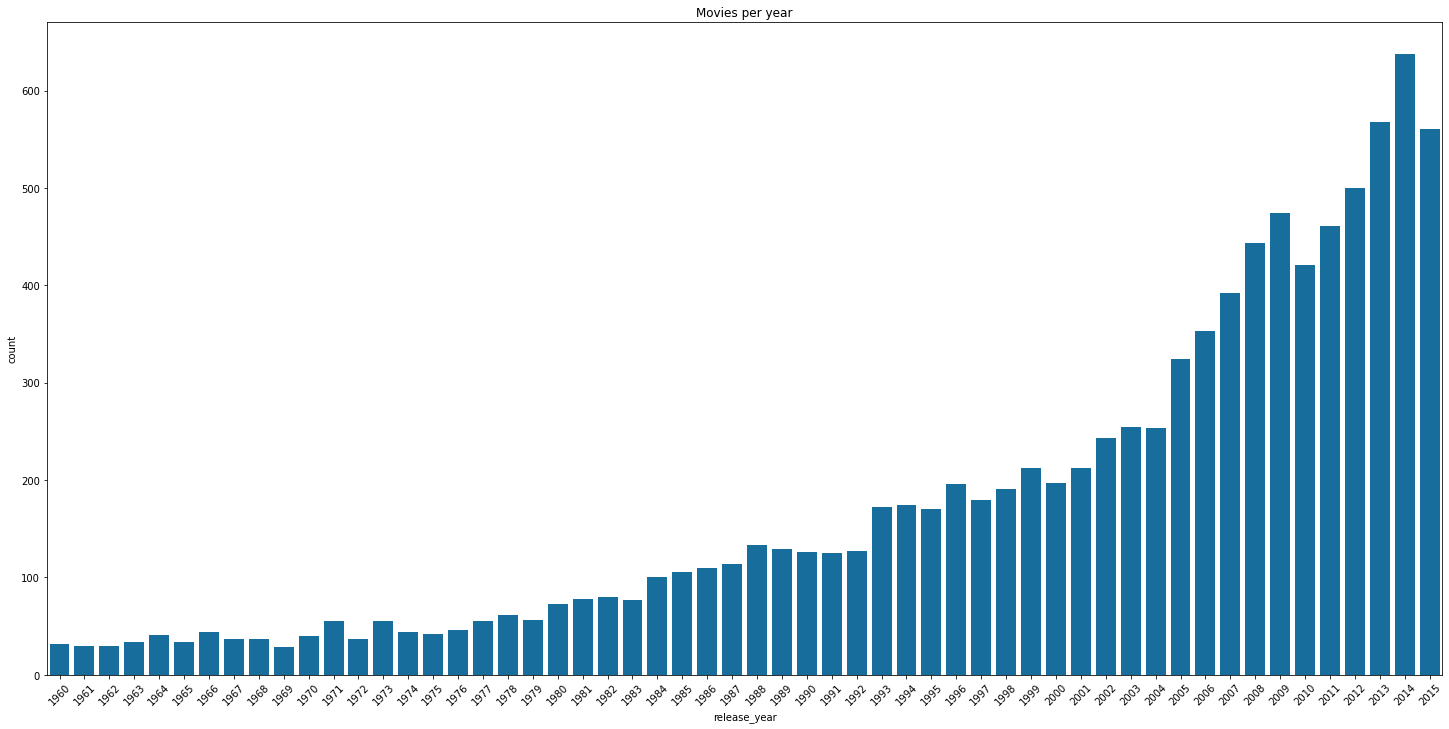

In [56]:
# understanding the number of movies released per year
# we will analyse this by doing a countplot
base_color = sns.color_palette('colorblind')[0]
plt.figure(figsize=(25, 12));
plt.xticks(rotation=45);
sns.countplot(df.release_year, color=base_color);
plt.title('Movies per year')
plt.show();

From the above visualization we can make a statement that on 2014 the number of
movies released was the maximum, which is above 600.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


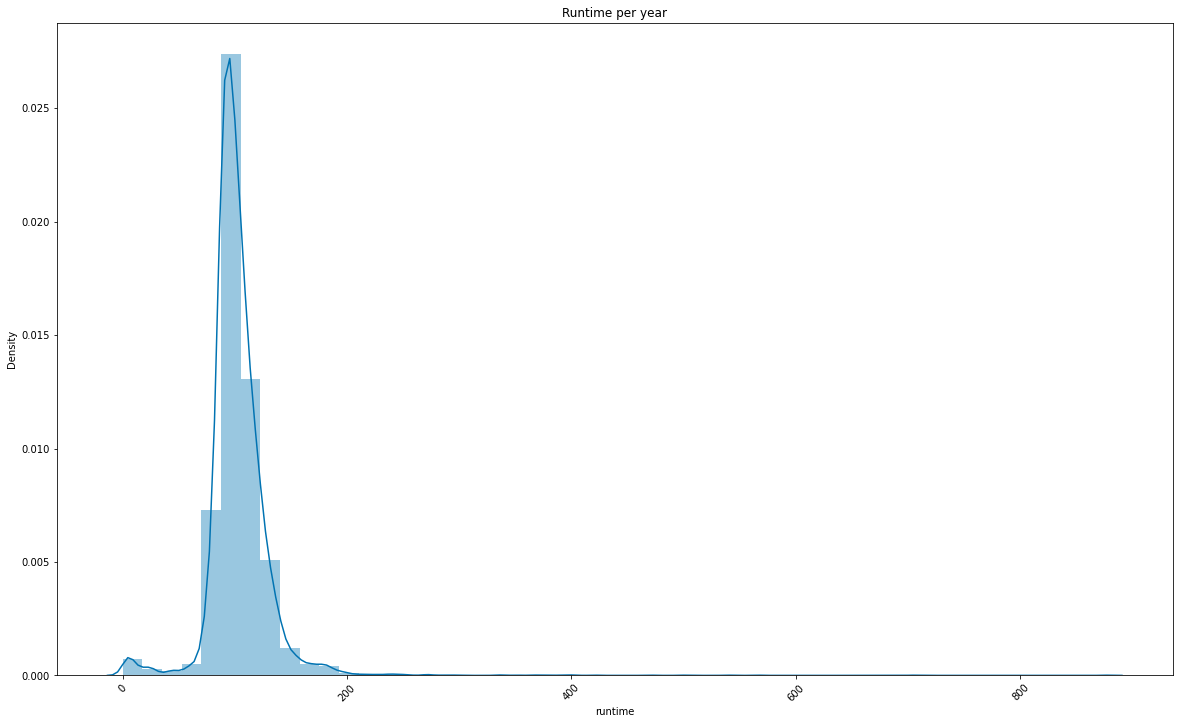

In [57]:
# now we want to understand what is the relation of length of the movies over the years
# we will plot histogram to understand it more clearly
base_color = sns.color_palette('colorblind')[0]
plt.figure(figsize=(20, 12));
plt.xticks(rotation=45);
sns.distplot(df.runtime, hist=True, kde=True, color=base_color)
plt.title('Runtime per year')
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


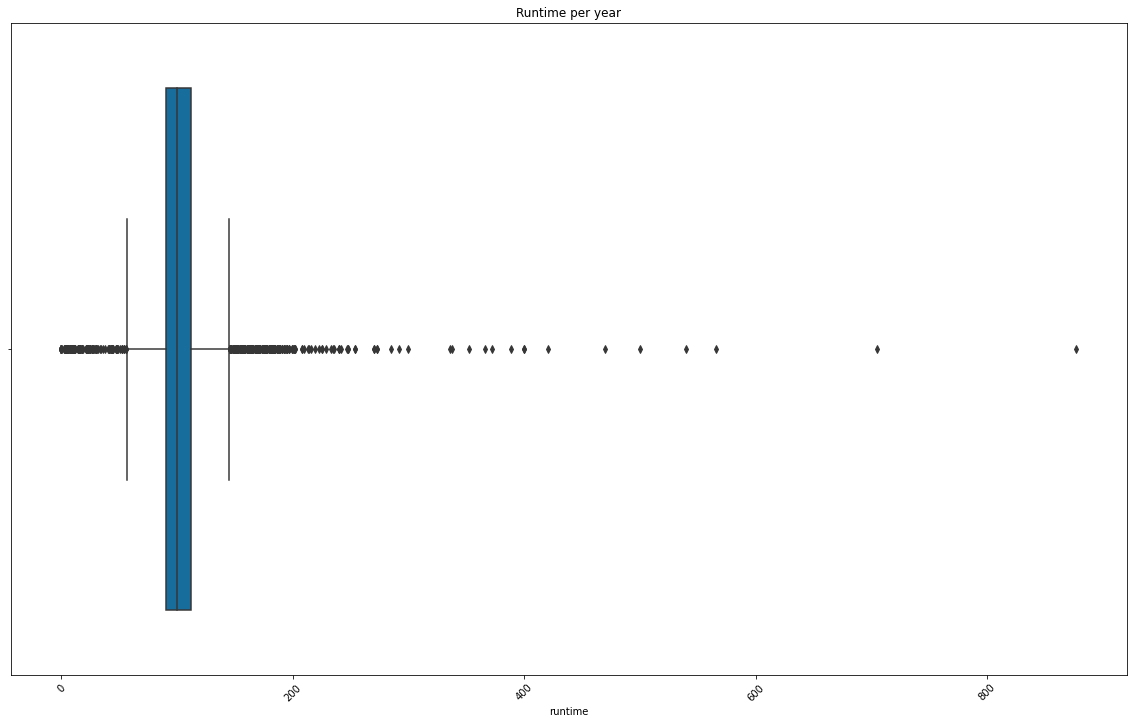

In [58]:
# to support the above we will take help of boxplot
base_color = sns.color_palette('colorblind')[0]
plt.figure(figsize=(20, 12));
plt.xticks(rotation=45);
sns.boxplot(df.runtime, color=base_color)
plt.title('Runtime per year')
plt.show();

In [59]:
# let us understand further before making any statement here
df['runtime'].describe()

count    9806.000000
mean      102.744340
std        28.134561
min         0.000000
25%        90.000000
50%       100.000000
75%       112.000000
max       877.000000
Name: runtime, dtype: float64

Comparing histogram, boxplot and from the description of the 'runtime' feature of the dataset, we can state the below

1. Average runtime of movies is 102 min
2. 25% movies have runtime less than 90 minutes
3. 50% movies have runtime less than 100 minutes
4. 75% movies have runtime less than 112 minutes
5. Min runtime is 0 minutes
6. Max runtime is 877 minutes

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
>Transformations <br>
1. The feature 'genre' was holding all of the genres that particular movie belongs to in a single '|' seperated string. To analyse the dataset upon all the given genres, it was necessary to perform transformation. We used split and explode methods to split the string and convert the results to rows.
2. New feature introduced 'profit'

> Drama, Comedy and Thriller are the top 3 genres holding maximum number of movies.<br>
Interestingly the number of movies per year has increased significantly over the course of years.<br>
The runtime of the movies, vary from 0 ~ 200 minutes
1. Average runtime of movies is 102 min
2. 25% movies have runtime less than 90 minutes
3. 50% movies have runtime less than 100 minutes
4. 75% movies have runtime less than 112 minutes
5. Min runtime is 0 minutes
6. Max runtime is 877 minutes

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> As unusual distribution, feature 'genre' was holding all of the genres that particular movie belongs to in a single '|' seperated string. To analyse the dataset upon all the given genres, it was necessary to perform transformation. We used split and explode methods to split the string and convert the results to rows. This was done as we wanted to perform some analysis on the genres feature.<br><br>
Again as part of tidiness we had to remove the duplicates the data was holding and dropped all the null values.<br>
We also discovered some outliers present in the runtime feature.


### Bivariate Analysis

In [60]:
#Declaring groupby function for code reuse
def group_by_avg(feature1,feature2):
    #This function will calculate mean
    gba = df.groupby(feature1)[feature2].mean()
    return gba

In [61]:
# We will try to understand how old movies are receiving ratings over time
avg_movie_rating_per_year = group_by_avg("release_year","vote_average")
avg_movie_rating_per_year.head()

release_year
1960    6.325000
1961    6.433333
1962    6.386667
1963    6.329412
1964    6.224390
Name: vote_average, dtype: float64

Text(0, 0.5, 'Average Rating')

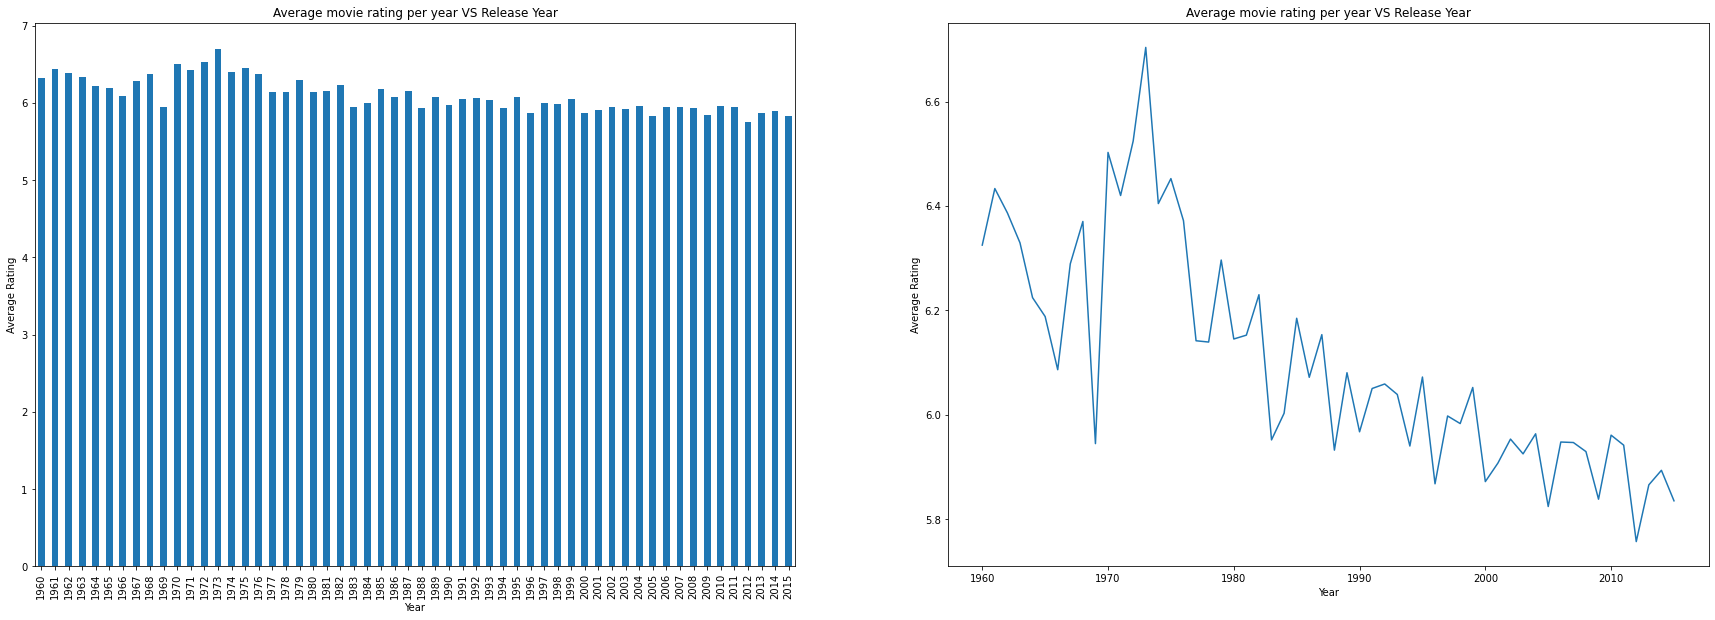

In [62]:
plt.subplot(1, 2, 1)
avg_movie_rating_per_year.plot(kind='bar', title='Average movie rating per year VS Release Year', figsize=(30,10))
#x-axis name
plt.xlabel('Year')
#y-axis name
plt.ylabel('Average Rating')
plt.subplot(1, 2, 2)
avg_movie_rating_per_year.plot(kind='line', title='Average movie rating per year VS Release Year', figsize=(30,10))
#x-axis name
plt.xlabel('Year')
#y-axis name
plt.ylabel('Average Rating')

Before we gather data, we need to understand the two graphs plotted above.
The one on the left is a bar graph where we have plotted average rating per year as a bar graph. Here we can see there is not much fluctuation in terms of rating. But when we zoom a bit which is the plot from the right hand side. It depicts good amount of fluctuations on average rating from year 1960 till 2015. Moreover we can notice there is a good spike in the graph between the year 1970 & 1980.

In [63]:
# Let us try to understand how the industry is performing over the years
# Calculate the mean of profit for each year
avg_profit_per_year = group_by_avg('release_year','profit')
avg_profit_per_year.head()

release_year
1960    3.842127e+06
1961    9.719440e+06
1962    5.361924e+06
1963    3.355103e+06
1964    7.353625e+06
Name: profit, dtype: float64

Text(0, 0.5, 'Average profit per year')

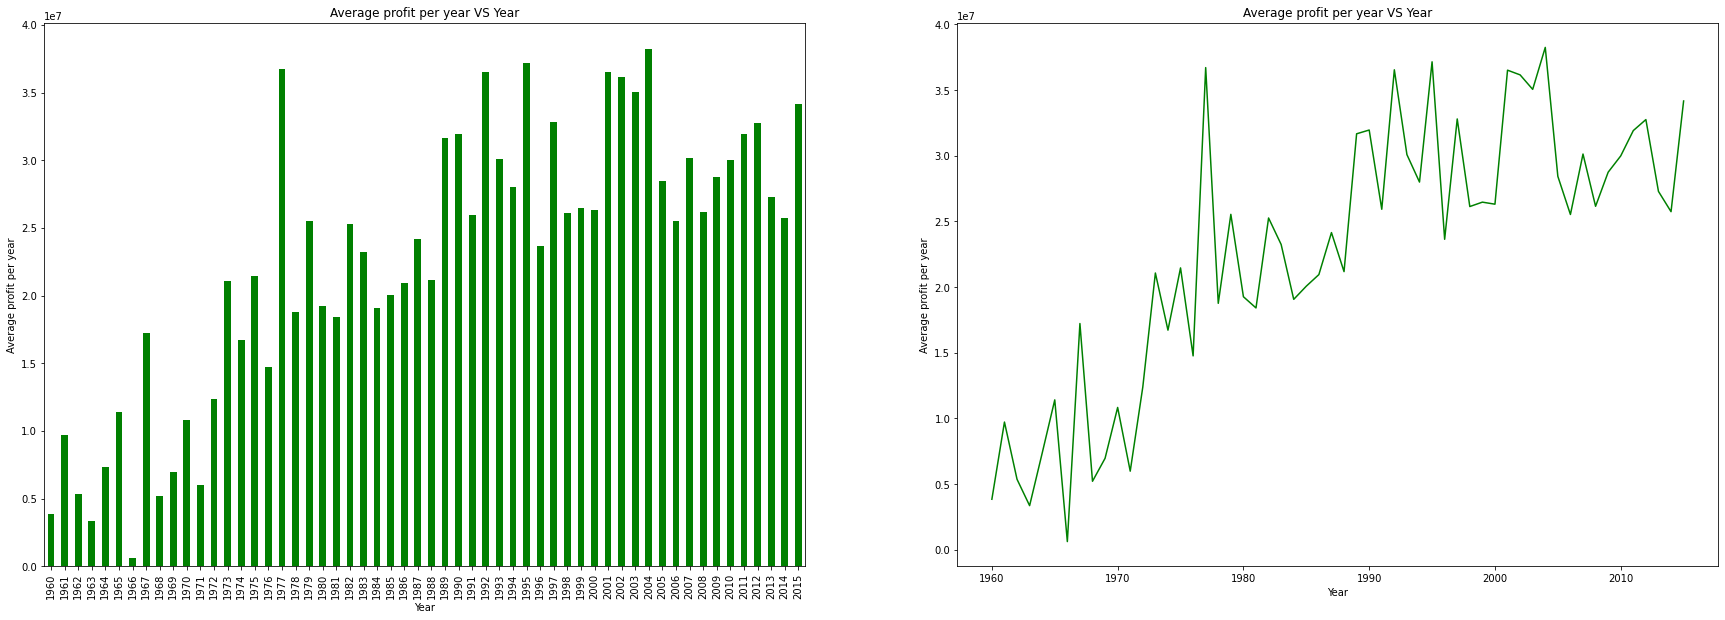

In [64]:
# Plotting line graph for understanding the average profit per year visually
plt.subplot(1, 2, 1)
avg_profit_per_year.plot(kind='bar', color='green', title='Average profit per year VS Year', figsize=(30,10))
# x-axis name
plt.xlabel('Year')
# y-axis name
plt.ylabel('Average profit per year')

# Plotting line graph for understanding the average profit per year visually
plt.subplot(1, 2, 2)
avg_profit_per_year.plot(kind='line', color='green', title='Average profit per year VS Year', figsize=(30,10))
# x-axis name
plt.xlabel('Year')
# y-axis name
plt.ylabel('Average profit per year')

From both the graphs left and right, it is evedent that the industry is performing really well and it is growing in terms of profit per year.

In [65]:
# Now since we cannot compare $ values across time (as noted above, a dollar in 1960 would buy a lot more than a dollar today, 
# so they are not directly comparable). Using the adjusted values, which are adjusted so that the purchasing power is the same across time allows you to compare.
df.insert(1,"profit_adj", df["revenue_adj"] - df["budget_adj"])
df.head()

,popularity,profit_adj,profit,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,1.254446e+09,1363528810,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,2.101614e+08,228436354,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,1.704191e+08,185238201,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,1.718723e+09,1868178225,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,1.210949e+09,1316249360,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


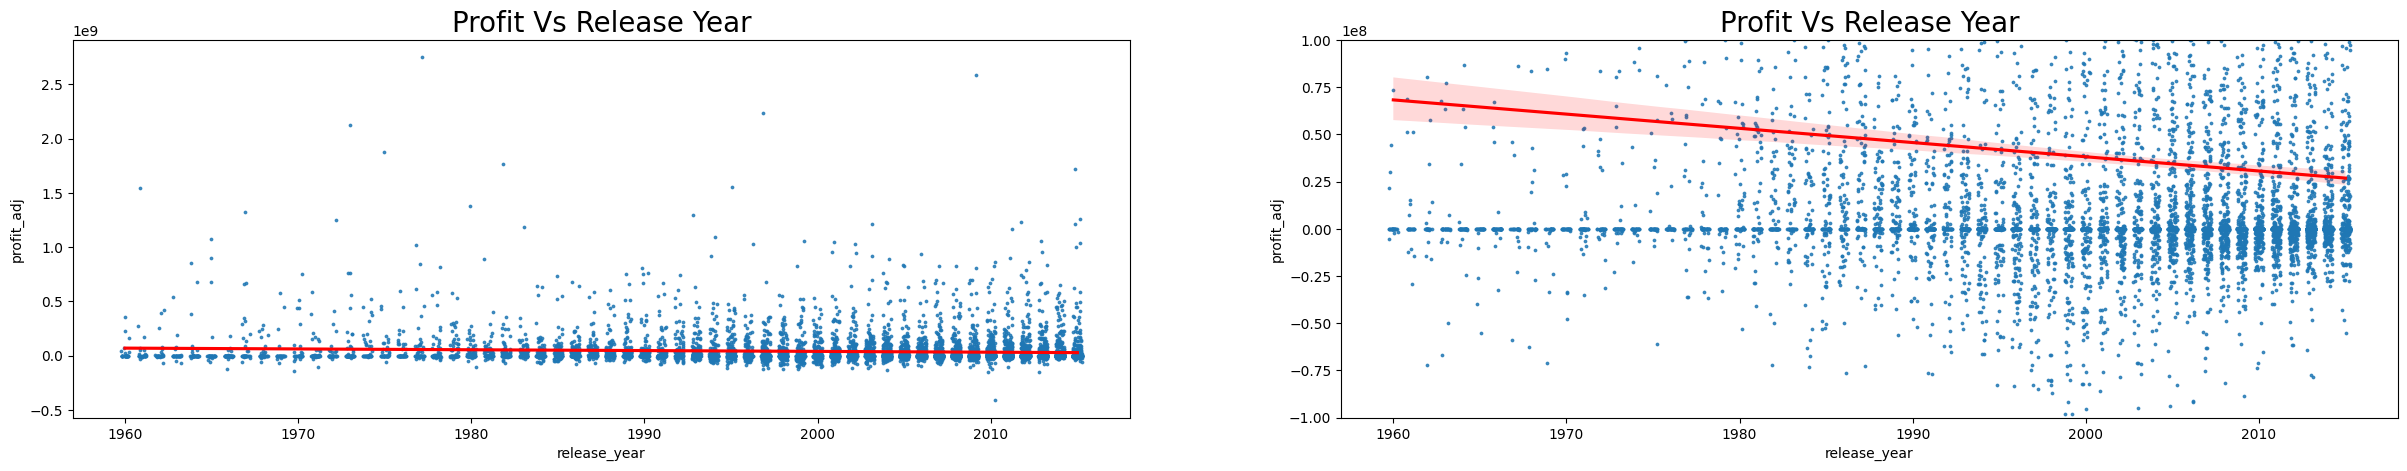

In [66]:
# Now plotting the adjusted values
plt.figure(figsize=(30,5), dpi=100)
plt.subplot(1, 2, 1)
sns.regplot(data=df, x='release_year', y='profit_adj', line_kws={'color':'red'},scatter_kws={'s':3}, x_jitter=0.25).set_title('Profit Vs Release Year', size=20)
plt.subplot(1, 2, 2)
sns.regplot(data=df, x='release_year', y='profit_adj', line_kws={'color':'red'},scatter_kws={'s':3}, x_jitter=0.25).set_title('Profit Vs Release Year', size=20)
plt.ylim(-10**8,10**8);

The above plots give us a clear picture of how profit has been over the years. The profit in terms of numeric value of '\$' might have increased over the years but the actual valuation of $ has decreased.

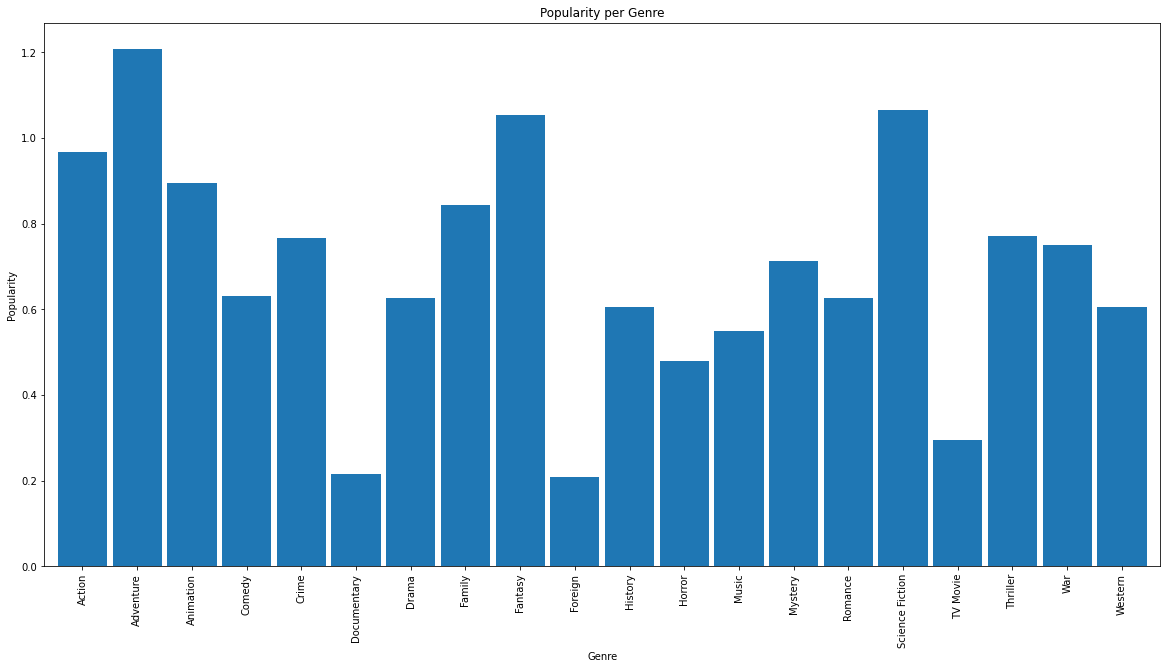

In [67]:
# Earlier we have observed that the genre Drama is holding the maximum number of movies
# Now we want to understand which genre is specifically the most popular one
# Here we will group by genre and average popularity
genres_df.groupby('genres').popularity.mean().plot.bar(width=0.9,figsize=[20,10],title='Popularity per Genre', xlabel="Genre", ylabel="Popularity")
# plt.xlabel('Genre')
# plt.ylabel('Popularity')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
>The ratings of the movies doesn't seem to have much effect overall from 1990 till 2015,
which is depicted in the bar plot. but if we look closer, zoom in a little bit at the top
portion of the graph there were significant ups and downs. This can be observed in the line plot.
From that we can say average ratings have decreased over the time.
<br><br>
Next understanding we wanted to develop is, if the average profit has increased or decreased
over the years. Clearly from both the plots we can conclude that the average profit has increased
quite significantly. But there is another side to this story, which is explained in the next question.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
>Direct comparison of '$' value over the course of years is not very natural. This is because in 1960 the living cost was significantly lower than the living cost of 2015. Similarly in 1960
one could buy a lot more with one dollar than can buy today. Hence we introduced another feature
profit_adj which is adjusted profit whose value is adjusted revenue minus adjusted budget.
We observed that as year increased, the adjusted profit has decreased. We found the line of trend
to be negatively sloped.
<br><br>We also observed that Adventure, Fantasy and Science Fiction are the top 3 most popular genres. From this Adventure is the most popular genre.

### Multivariate Analysis

<Figure size 1400x700 with 0 Axes>

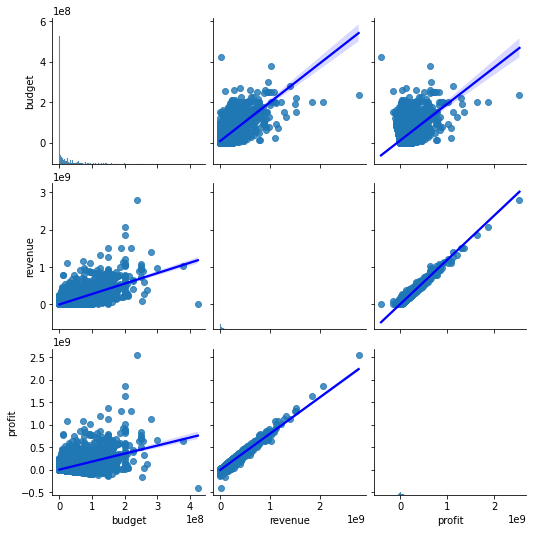

In [68]:
# to understand the relation between budget, revenue and profit
# visualizing the variables in a pair plot
plt.figure(figsize=(14,7), dpi=100)
sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'blue'}}, vars = ['budget', 'revenue', 'profit'])
plt.show()

From the above plot we can state that there are linear relation between budget, revenue & profit features. Which indicates more the budget is more is the revenue hence the profit.

In [69]:
# to understand the relation between release year, genre and profit
# creating pivot table with the required features
genre_pivot = genres_df.pivot_table(values='profit',index='release_year',columns='genres')
genre_pivot.dropna(inplace=True)

Text(0.5, 1.0, 'Release year - Profit spread per Genre')

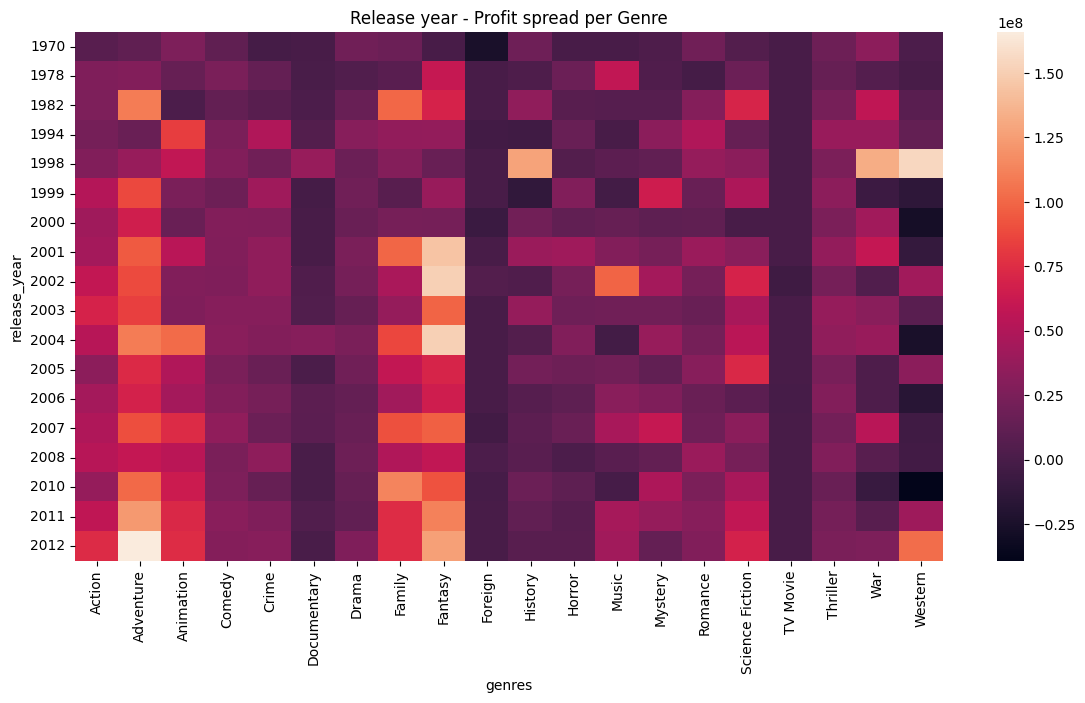

In [70]:
# plotting heatmap of the generated pivot
plt.figure(figsize=(14,7), dpi=100)
sns.heatmap(genre_pivot).set_title('Release year - Profit spread per Genre')

From the above Heatmap we see some variations in profit feature and we can clearly see there are values which are below 0, depicting a loss. To understand this better we perform the below analysis.

In [71]:
# engineering a new categorical feature namely 'profit_or_loss'
# this feature will hold values like 'profit' | 'loss' | 'at cost'
# based on if the value is greater than 0 or less than 0 or even equal respectively
profit_or_loss = []
n = df.shape[0]
for i in range(n):
  if(df.iloc[i]['profit'] < 0):
    profit_or_loss.append("loss")
  elif(df.iloc[i]['profit'] > 0):
    profit_or_loss.append("profit")
  else:
    profit_or_loss.append("at cost")

In [72]:
# adding the engineered feature to the existing dataframe df
df['profit_or_loss'] = profit_or_loss
df.head()

,popularity,profit_adj,profit,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_or_loss
0,32.985763,1.254446e+09,1363528810,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,profit
1,28.419936,2.101614e+08,228436354,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,profit
2,13.112507,1.704191e+08,185238201,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,profit
3,11.173104,1.718723e+09,1868178225,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,profit
4,9.335014,1.210949e+09,1316249360,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,profit


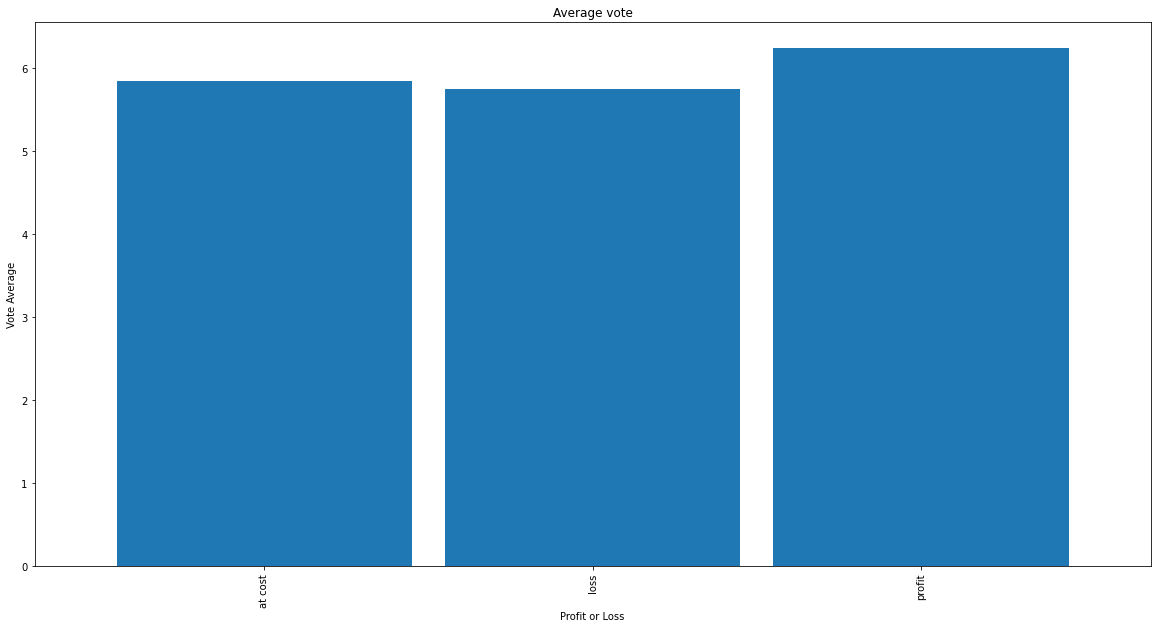

In [73]:
df.groupby('profit_or_loss').vote_average.mean().plot.bar(width=0.9,figsize=[20,10],title='Average vote', xlabel="Profit or Loss", ylabel="Vote Average")

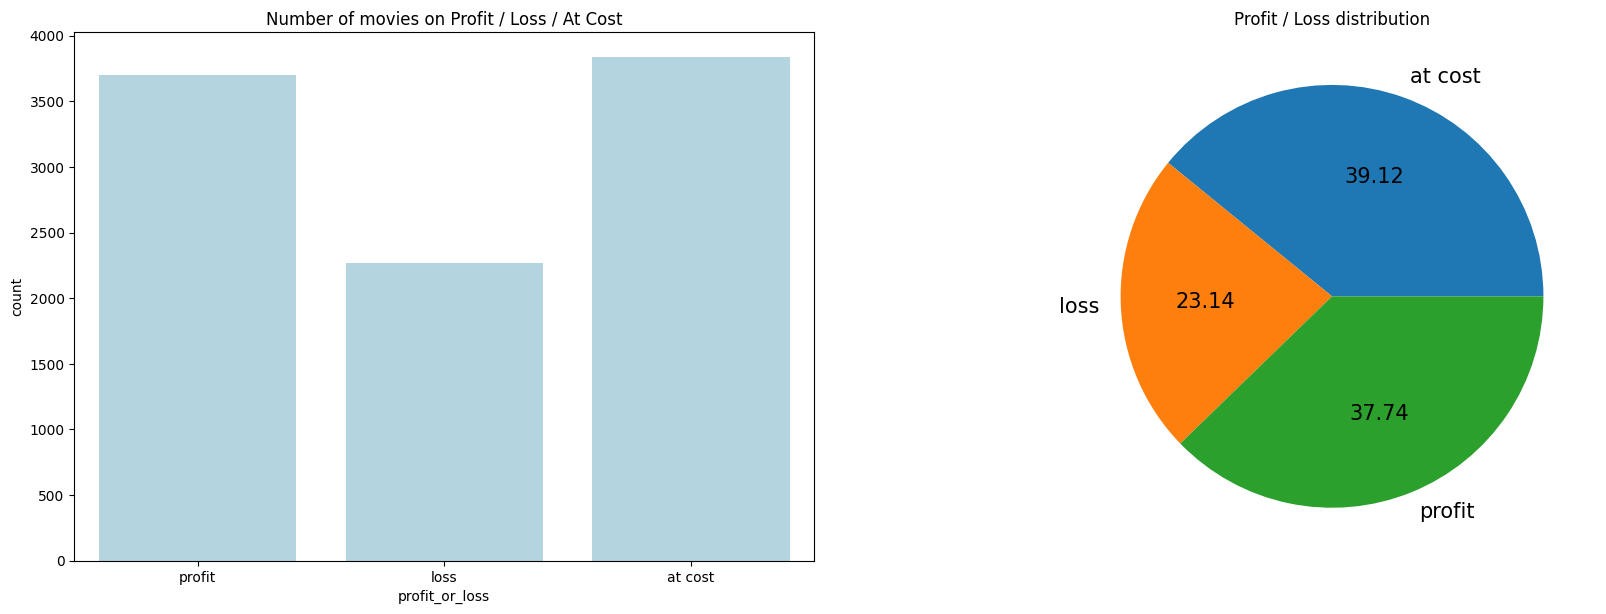

In [74]:
# understanding the number of movies under each category
plt.figure(figsize=(21,7), dpi=100)
plt.subplot(1, 2, 1)
sns.countplot(x ='profit_or_loss', data = df, color = 'lightblue').set_title('Number of movies on Profit / Loss / At Cost')
plt.subplot(1, 2, 2)
df.groupby('profit_or_loss').size().plot(kind='pie', textprops={'fontsize': 15}, autopct='%.2f', ylabel="", title="Profit / Loss distribution")

Observed that maximum number of movies have no loss or no profit condition, which is depicted by 'at cost' in the above plot.
39.12 % of the movies have no profit or loss.

Text(0.5, 1.0, 'Vote Average - Popularity spread per Profit / Loss')

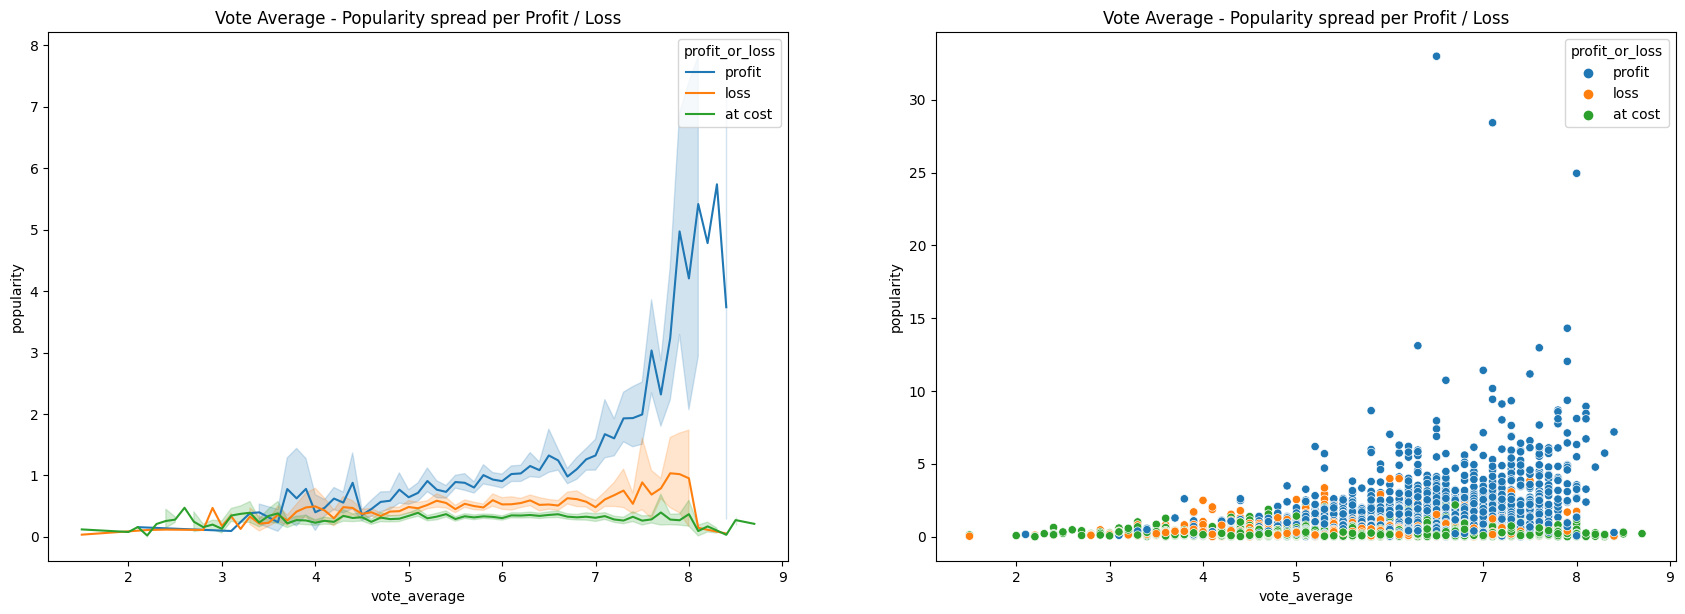

In [75]:
# to understand on these categories of profit_or_loss
# how are average vote and popularity spread across
plt.figure(figsize=(21,7), dpi=100)
plt.subplot(1, 2, 1)
sns.lineplot(x="vote_average", y="popularity", data=df, hue='profit_or_loss').set_title('Vote Average - Popularity spread per Profit / Loss')
plt.subplot(1, 2, 2)
sns.scatterplot(x="vote_average", y="popularity", data=df, hue='profit_or_loss').set_title('Vote Average - Popularity spread per Profit / Loss')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> In this section we extended our investigation further to understand the relationship between profit, budget and revenue individualy over the years upon the three main features, profit vs budget vs revenue. Our observation was, as the line of trend is increasing positively, it signifies that there is a rise of revenue & profit observed when there is a rise in budget.<br>
We further investigated how the industry is performing over the years. We plotted a heatmap on profit and release year grouped on genres. Where we found indications of loss which were suppressed earlier. This is when we introduced another feature profit_or_loss just to hold category values if there is a profit, or loss or the movie just was able to collect cost price and make no profit or loss. We found 39.12 % of the movies are made at cost, which means no profit, no loss. where as 37.74 % of the movies could make a profit. And 23.14 % of the movies have made a loss.

### Were there any interesting or surprising interactions between features?
>Interestingly revenue, budget & profit had a very linear and progressive relation amongst them.
<br>
Now We wnated to understand how movies associated with profit or loss or at cost, relate with popularity. Interestingly movies which are less popular made no profit, no loss. While movies which were somewhat popular made a loss. Most popular movies anyways made profit.
<br>
We also found that movies with high vote have resulted in profit.
<br>
Combining data from pie plot and line graph we can state that 
1. 23.14 % of the movies made a loss even with average vote more than 5.5 and with low popularity
2. 39.12 % of the movies made no gain no loss even with average vote more than 5.5 and with low popularity
3. 37.74 % of the movies made profit with average vote more than 6 and with high popularity.

So we can conclude that popularity plays an important role in order for a movie to perform well in terms of revenue.

In [62]:
df.to_csv('cleaned_df.csv', index=False)
genres_df.to_csv('genres_split.csv', index=False)